In [18]:
import numpy as np
import pandas as pd

In [19]:
df_data = pd.read_csv('student_interest_confident_responses_new.csv')

In [20]:
#rows and columns
df_data.shape

(100, 16)

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Q1_Logical_Problems       100 non-null    int64
 1   Q2_Physical_Structures    100 non-null    int64
 2   Q3_Health_Wellbeing       100 non-null    int64
 3   Q4_Visual_Designs         100 non-null    int64
 4   Q5_Machines_Tools         100 non-null    int64
 5   Q6_Programming            100 non-null    int64
 6   Q7_Construction_Projects  100 non-null    int64
 7   Q8_Innovative_Solutions   100 non-null    int64
 8   Q9_Data_Statistics        100 non-null    int64
 9   Q10_Infrastructure        100 non-null    int64
 10  Q11_Patient_Care          100 non-null    int64
 11  Q12_New_Technologies      100 non-null    int64
 12  Q13_Models_Blueprints     100 non-null    int64
 13  Q14_Human_Biology         100 non-null    int64
 14  Q15_Creative_Arts         100 non-null    i

In [22]:
df_data.head()

,Q1_Logical_Problems,Q2_Physical_Structures,Q3_Health_Wellbeing,Q4_Visual_Designs,Q5_Machines_Tools,Q6_Programming,Q7_Construction_Projects,Q8_Innovative_Solutions,Q9_Data_Statistics,Q10_Infrastructure,Q11_Patient_Care,Q12_New_Technologies,Q13_Models_Blueprints,Q14_Human_Biology,Q15_Creative_Arts,Interest
0,4,4,4,3,2,3,1,3,4,2,4,4,1,4,3,2
1,3,4,3,2,4,3,4,1,4,4,4,3,1,3,2,3
2,1,4,3,3,4,1,4,3,2,4,4,2,4,4,3,0
3,1,3,3,4,4,1,4,3,2,4,4,1,4,4,4,0
4,4,4,1,3,3,3,4,3,3,3,1,4,4,2,2,4


In [23]:
print(f"Interest:- {df_data['Interest'].unique()}")

Interest:- [2 3 0 4 1]


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

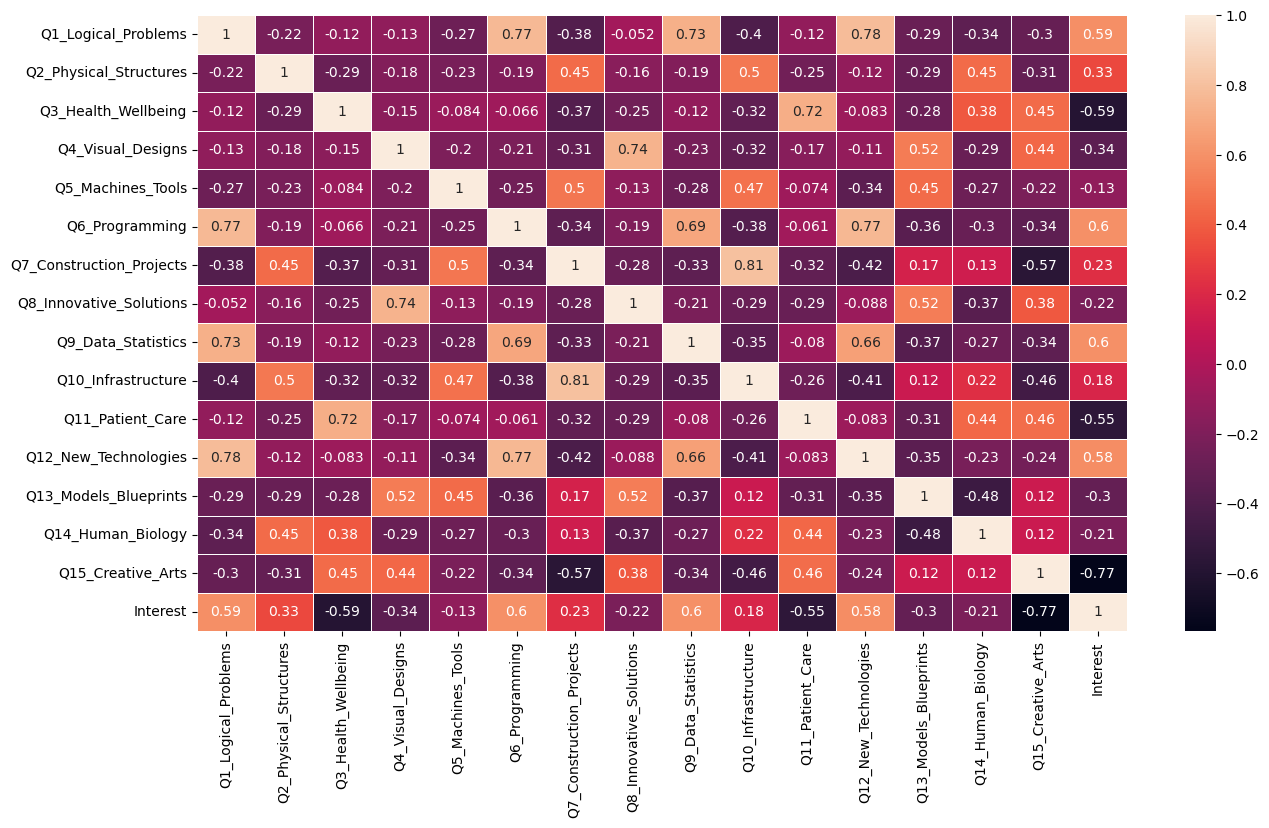

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df_data.corr(),annot=True, linewidths=0.5) #annot will annotate the values
plt.show()

In [26]:
target_corr = df_data.corr()['Interest'].abs().sort_values(ascending=False)[1:]
print(target_corr)

Q15_Creative_Arts           0.766201
Q6_Programming              0.599501
Q9_Data_Statistics          0.596998
Q1_Logical_Problems         0.591022
Q3_Health_Wellbeing         0.589157
Q12_New_Technologies        0.584113
Q11_Patient_Care            0.550133
Q4_Visual_Designs           0.340395
Q2_Physical_Structures      0.325596
Q13_Models_Blueprints       0.304166
Q7_Construction_Projects    0.225800
Q8_Innovative_Solutions     0.219042
Q14_Human_Biology           0.210928
Q10_Infrastructure          0.183042
Q5_Machines_Tools           0.126859
Name: Interest, dtype: float64


In [27]:
df_data['Interest'].value_counts()

Interest
2    20
3    20
0    20
4    20
1    20
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
X = df_data.drop('Interest', axis=1)
y = df_data['Interest']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20 ,random_state=25)

print(f"X train: {X_train.shape}")
print(f"X Test: {X_test.shape}")

X train: (80, 15)
X Test: (20, 15)


In [30]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()
#training the ML
dct.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix

In [32]:


# Predict on test set
y_pred = dct.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-score
print("\nPrecision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

print("\nPrecision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))



Confusion Matrix:
[[5 0 0 0 0]
 [0 4 0 0 0]
 [0 0 2 0 0]
 [0 0 0 5 0]
 [0 0 0 0 4]]

Accuracy: 1.0

Precision (Macro): 1.0
Recall (Macro): 1.0
F1 Score (Macro): 1.0

Precision (Weighted): 1.0
Recall (Weighted): 1.0
F1 Score (Weighted): 1.0


In [33]:
import pickle
with open("model_2.pkl", "wb") as file:
    pickle.dump(dct, file)